<a href="https://colab.research.google.com/github/Alfonso-Jesus-Garcia-Moya/Tecnicas_de_inteligencia_artificial/blob/main/SEMANA%2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sesión 15. Inteligencia de enjambre y entornos de desarrollo

## Particle Swarm Optimization

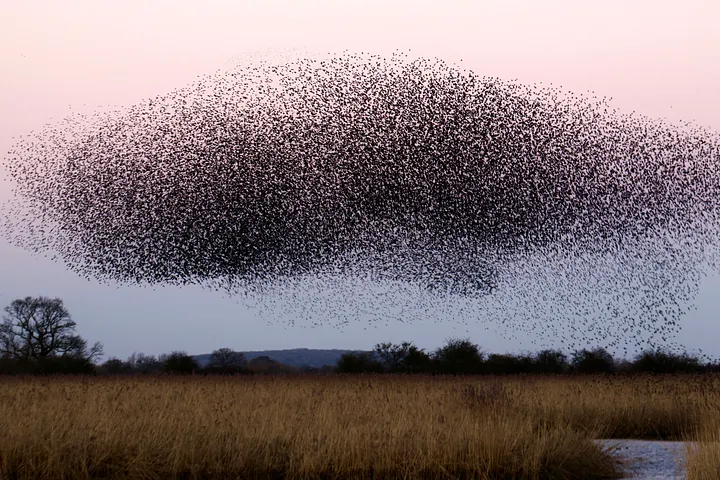

Propuesto en 1995 por Kennedy y Eberhart

Perte de la idea donde los sociobiólogos creen que un banco de peces o una bandada de pájaros que se mueven en grupo pueden beneficiarse de la experiencia de todos los demás miembros

Esto queire decir que mientras un pájaro vuela y busca alimento al azar, por ejemplo, todos los pájaros de la bandada pueden compartir su descubrimiento y ayudar a toda la bandada a obtener la mejor caza

Por ejemplo, se puede simular el movimiento de una bandada de pájaros donde cada pájaro ayuda a encontrar la solución óptima en un espacio de soluciones de alta dimensión

* la mejor solución encontrada por la bandada es la mejor solución en ese espacio

La idea de PSO es muy similar a la bandana de pájaros que buscan comida, porque una partícula vendría siendo un pájaro, mientras la comida sería la solución

PSO se basa en dos términos: **población y enjambre**

* El enjambre está formado por poblaciones que comprenden partículas
* Una partícula es una posible solución

partícula --->  población ----> enjambre

Una partícula es un pájaro que forma parte de una població o enjambre, que es la bandada

En términos más específicos, una partícula es un pájaro individual, una población es una bandada de pájaros y un enjambre son todas las bandadas juntas, actuando como un único colectivo dinámico

Una partícula es una poible solución que puede ser un conjunto de números reales

Las partículas tienen dos características: **posición y velocidad**

Como las partículas vuelan, cambian de posición de forma iterativa, paso a paso

* Un conjunto de partículas, cada una con una posición y velocidad determinadas, vuelan juntas en busca del óptimo global formando una población

* Cada partícula adjusta su velocidad de desplazamiento corresponde dinámicamente con las experiencias de vuelo propias y de sus compañeros

* Las poblaciones aparecen de forma iterativa y solo viven durante una iteración, pero intercambian información entre sí, por lo que cada población siguiente está más cerca de encontrar la solución que la anterior

Cada partícula modifica su posición de acuerdo a:

* su posición actual
* su velocidad actual
* la distancia entre su posición actual y la mejor solución que una partícula ha logrado (pbest)
* la velocidad entre su posición actual y la mejor solución global de todas las partículas dentro del enjambre (se comparte)(gbest)

En este sentido, las partículas se mueven guiadas por su memoria y la del grupo

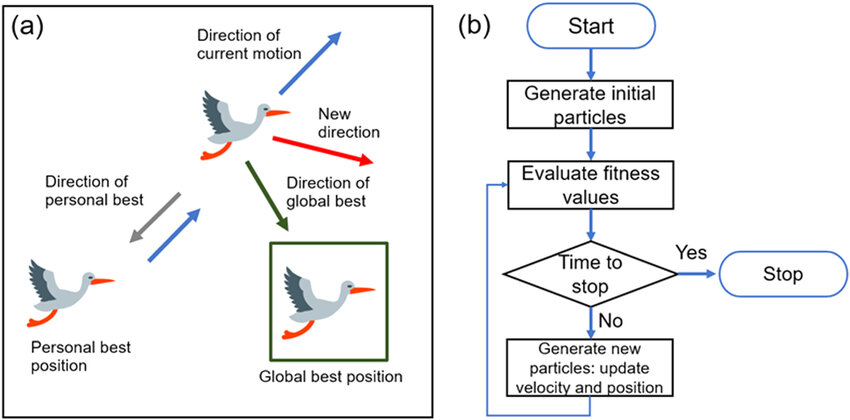

imagen a

* el ave representa una partícula = solución candidata
* las flechas representan las fuerzas que afectan su movimiento

1. La dirección actual (inercia) representa el vector azul y es la idea de seguir más o menos en la dirección dónde ya iba
2. La dirección hacia su mejor personal (pbest) que es la flecha gris y representa lo que a esa partícula le funcionó antes
3. La dirección hacia la mejor global (gbest) que es la flecha verde y representa el mejor punto hallado por toda la bandada
4. La nueva dirección es la flecha roja y es la combinación ponderada de las anteriores

#### Aplicaciones

* Búsqueda de hiperparámetros
* Robótica (evitar obstáculos, minimizar distancia, ahorro de energía)
* Predicción de mercados financieros
* Problemas de ingeniería (optimización de pesos, resistencia, vibración)

#### Puntos clave:

* Es uno de los algoritmos bioinspirados que busca una solución óptima en el espacio de soluciones

* Se diferencia de otros algoritmos de optimización en que solo necesita la función objetivo y no depende del gradiente ni de ninguna forma diferencial del objetivo

* Es uno de los pocos algoritmos que tiene muy pocos hiperparámetros

## Código PSO

Problema de maximización : encontrar el valor más alto para incrementar (métrica de evaluación, probabilidad, ganancia, beneficio, energía producida, estabilidad)

Problema de minimización : encontrar el valor más bajo para reducir (error, coste, tiempo, pérdida, disntancia, energía consumida)

In [ ]:
#importanto librerías
import random
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#cargando datos
df = load_breast_cancer()

In [ ]:
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
#dividiendo en x/y
X = df.data
y = df.target

In [ ]:
#dividiendo datos en entrenamiento y prubea
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#número de columnas, para que el hiperparámetro no sea mayor que el número total de las columnas
n_features = X.shape[1]   #necesario para max_features

Inercia: parte del movimiento que permite a la partícula seguir viajando en la misma dirección en la que se movía (impulso)

Peso cognitivo: tendencia de la partícula a regresar a su propia mejor exploración personal (pbest) (memoria individual)

Peso social: tendencia a moverse hacie el mejor lugar encontrado por el grupo completo (gbest) (aprendizaje colectivo)

In [ ]:
#creando función objetivo que convierte parámetros continuos en hiperparámetros válidos,
#entrena un árbol de decisión y devuelve su accuracy (porque PSO está maximizando exactitud)
def evaluar_arbol(max_depth_real, max_features_real):

    #redondeando y asegurando rangos válidos para max_depth
    max_depth = int(round(max_depth_real))
    max_depth = max(1, min(20, max_depth))

    #redondeando y asegurando rangos válidos para max_features
    max_features = int(round(max_features_real))
    max_features = max(1, min(n_features, max_features))

    #creando modelo con hiperparámetros sugeridos por la partícula
    clf = DecisionTreeClassifier(
        max_depth=max_depth,
        max_features=max_features,
        random_state=42
    )

    #entrenando el árbol con el conjunto de entrenamiento
    clf.fit(X_train, y_train)

    #calculando accuracy del modelo usando el conjunto de prueba
    acc = clf.score(X_test, y_test)

    #devolviendo valor de desempeño (que PSO intentará maximizar)
    return acc


#definiendo configuración básica del enjambre
num_particles = 10                                            #definiendo número de partículas de la población
num_iter = 30                                                 #definiendo número de iteraciones de PSO

#definiendo parámetros fundamentales
W = 0.6                                                      #definiendo inercia (mantiene parte de la velocidad anterior)
C1 = 1.2                                                      #definiendo peso cognitivo (atrae hacia la mejor experiencia personal)
C2 = 1.2                                                      #definiendo peso social (atrae hacia la mejor solución del grupo)

#definiendo el rango permitido para los hiperparámetros a optimizar
max_depth_min, max_depth_max = 1, 20                          #definiendo límites para max_depth
maxf_min, maxf_max = 1, n_features                            #definiendo límites para max_features


#reando población inicial con posiciones y velocidades aleatorias
particles = []                                                #creando lista para almacenar partículas

for _ in range(num_particles):
    #creando posición inicial aleatoria dentro del rango permitido
    x1 = random.uniform(max_depth_min, max_depth_max)         #creando propuesta para max_depth
    x2 = random.uniform(maxf_min, maxf_max)                   #creando propuesta para max_features

    #creando velocidad inicial aleatoria para cada dimensión del problema
    v1 = random.uniform(-2, 2)
    v2 = random.uniform(-2, 2)

    #calculando fitness inicial evaluando el árbol con esos hiperparámetros
    acc = evaluar_arbol(x1, x2)

    #creando estructura de partícula con posición, velocidad y mejores valores conocidos
    particles.append({
        "pos": np.array([x1, x2], dtype=float),               #creando vector de posición
        "vel": np.array([v1, v2], dtype=float),               #creando vector de velocidad
        "best_pos": np.array([x1, x2], dtype=float),          #creando mejor posición personal
        "best_val": acc                                       #creando mejor desempeño personal
    })


#encontrando la mejor partícula global después de la inicialización
global_best = max(particles, key=lambda p: p["best_val"])     #creando selección de mejor partícula
global_best_pos = global_best["best_pos"].copy()              #creando copia de mejor posición global
global_best_val = global_best["best_val"]                     #almacenando valor de desempeño global


#iniciando ciclo principal de PSO que ajusta velocidades, posiciones y evalúa nuevas soluciones
for it in range(num_iter):
    for p in particles:

        #creando dos valores aleatorios necesarios para las componentes cognitiva y social
        r1 = random.random()
        r2 = random.random()

        #actualizando velocidad combinando inercia, peso cognitivo y peso social
        p["vel"] = (
            W * p["vel"]
            + C1 * r1 * (p["best_pos"] - p["pos"])
            + C2 * r2 * (global_best_pos - p["pos"])
        )

        #actualizando posición sumando la nueva velocidad
        p["pos"] = p["pos"] + p["vel"]

        #limitando la posición dentro del espacio permitido para cada hiperparámetro
        p["pos"][0] = np.clip(p["pos"][0], max_depth_min, max_depth_max)
        p["pos"][1] = np.clip(p["pos"][1], maxf_min, maxf_max)

        #calculando desempeño (fitness) de la nueva posición
        acc = evaluar_arbol(p["pos"][0], p["pos"][1])

        #actualizando mejor experiencia personal si la nueva solución es mejor
        if acc > p["best_val"]:
            p["best_val"] = acc
            p["best_pos"] = p["pos"].copy()

        #actualizando mejor solución global si esta partícula supera al resto
        if acc > global_best_val:
            global_best_val = acc
            global_best_pos = p["pos"].copy()

    #imprimiendo estado actual del enjambre tras cada iteración
    print(f"Iter {it:2d} | Mejor accuracy global = {global_best_val:.4f} "
          f"| Parámetros = max_depth={int(round(global_best_pos[0]))}, "
          f"max_features={int(round(global_best_pos[1]))}")


Iter  0 | Mejor accuracy global = 0.9580 | Parámetros = max_depth=11, max_features=3
Iter  1 | Mejor accuracy global = 0.9580 | Parámetros = max_depth=11, max_features=3
Iter  2 | Mejor accuracy global = 0.9580 | Parámetros = max_depth=11, max_features=3
Iter  3 | Mejor accuracy global = 0.9580 | Parámetros = max_depth=11, max_features=3
Iter  4 | Mejor accuracy global = 0.9580 | Parámetros = max_depth=11, max_features=3
Iter  5 | Mejor accuracy global = 0.9580 | Parámetros = max_depth=11, max_features=3
Iter  6 | Mejor accuracy global = 0.9580 | Parámetros = max_depth=11, max_features=3
Iter  7 | Mejor accuracy global = 0.9580 | Parámetros = max_depth=11, max_features=3
Iter  8 | Mejor accuracy global = 0.9580 | Parámetros = max_depth=11, max_features=3
Iter  9 | Mejor accuracy global = 0.9580 | Parámetros = max_depth=11, max_features=3
Iter 10 | Mejor accuracy global = 0.9580 | Parámetros = max_depth=11, max_features=3
Iter 11 | Mejor accuracy global = 0.9580 | Parámetros = max_depth

In [ ]:
#entrenamiento del árbol con hiperparámetros
best_max_depth = int(round(global_best_pos[0]))
best_max_features = int(round(global_best_pos[1]))

clf_best = DecisionTreeClassifier(
    max_depth=best_max_depth,
    max_features=best_max_features,
    random_state=42
)

clf_best.fit(X_train, y_train)
final_acc = clf_best.score(X_test, y_test)

In [ ]:
print("Mejores hiperparámetros encontrados por PSO:")
print("max_depth        =", best_max_depth)
print("max_features     =", best_max_features)
print("Accuracy final   =", final_acc)

Mejores hiperparámetros encontrados por PSO:
max_depth        = 6
max_features     = 4
Accuracy final   = 0.972027972027972


## Código implementado

In [ ]:
#importando librerías
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#cargando el conjunto de datos
df = load_breast_cancer()

In [ ]:
#obteniendo información del conjunto
df_features = pd.DataFrame(df.data, columns = df.feature_names)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df_features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#obteniendo primeros registros
df_features.head()
#df_features.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#obteniendo información
df_features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#obteniendo variable predictora
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
#obteniendo registros por etiqueta (maligno[0], benigno[1])
df_target = pd.DataFrame(df.target, columns=['target'])
df_target['target'].value_counts()

,count
target,
1,357
0,212


In [ ]:
#dividiendo en x/y
X, y = df.data, df.target

In [ ]:
#dividiendo los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#creando clasificador
clf = DecisionTreeClassifier(max_depth=5, max_features=25, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=25, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(max_depth=6, max_features=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features=4, random_state=42)

In [ ]:
#evaluando con accuracy
accuracy = clf.score(X_test, y_test)
print("Exactitud del sistema inteligente:", accuracy)

Exactitud del sistema inteligente: 0.972027972027972
